In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

In [ ]:
df = pd.read_csv('/content/bronze (1).csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1930-12-08T08:01:02.000Z,23.261,120.277,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-12-03T18:51:47.000Z,18.233,96.298,10.0,7.4,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-12-02T07:01:30.000Z,25.854,98.356,35.0,6.2,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-11-28T07:32:56.000Z,18.779,-106.767,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-11-25T19:02:53.000Z,35.050,139.129,15.0,6.9,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##  Kernel Density Estimation
: This will visualize the distribution of earthquake to happen.

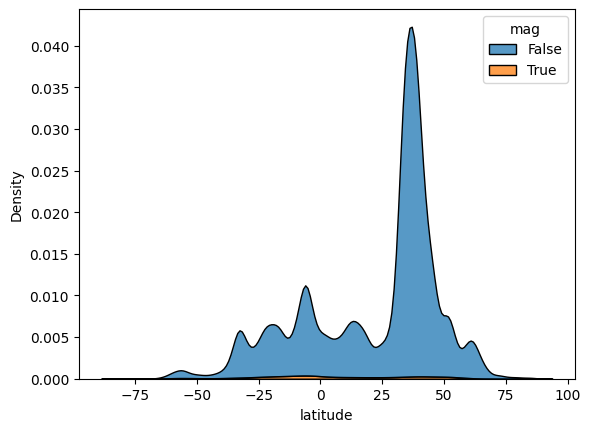

In [ ]:
import seaborn as sns
sns.kdeplot(data=df, x='latitude', hue = df['mag'] >= 6.0, multiple='stack');

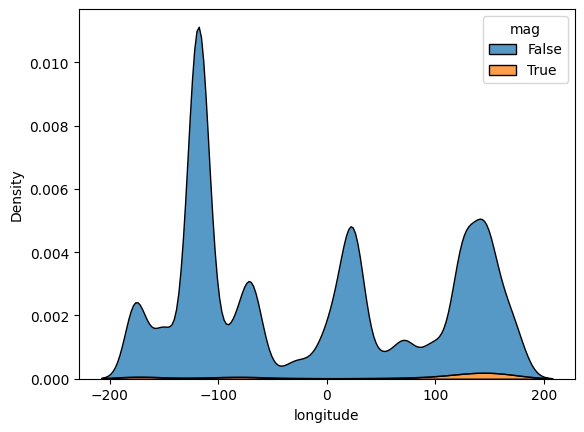

In [ ]:
sns.kdeplot(data=df, x='longitude', hue = df['mag'] >= 6.0, multiple='stack');

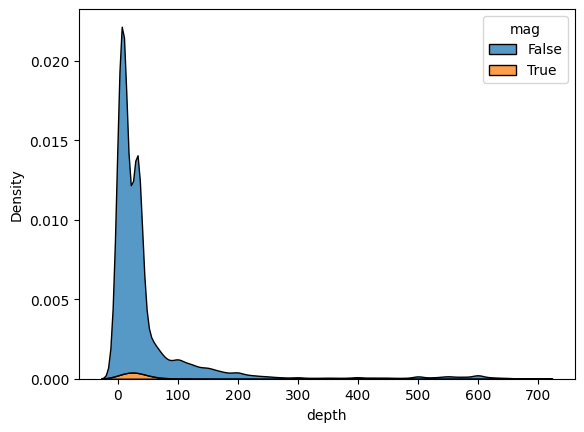

In [ ]:
sns.kdeplot(data=df, x='depth', hue = df['mag'] >= 6.0, multiple='stack');

In [ ]:
print("Check Data Structure:\n")
print(df.info())

Check Data Structure:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288500 entries, 0 to 288499
Data columns (total 22 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             288500 non-null  object 
 1   latitude         288500 non-null  float64
 2   longitude        288500 non-null  float64
 3   depth            288495 non-null  float64
 4   mag              288500 non-null  float64
 5   magType          288394 non-null  object 
 6   nst              72230 non-null   float64
 7   gap              72116 non-null   float64
 8   dmin             48060 non-null   float64
 9   rms              234068 non-null  float64
 10  net              288500 non-null  object 
 11  id               288500 non-null  object 
 12  updated          288500 non-null  object 
 13  place            0 non-null       float64
 14  type             0 non-null       float64
 15  horizontalError  0 non-null       float64
 16  depthError     

# Missing Data

In [ ]:
df.isnull().sum()

time                    0
latitude                0
longitude               0
depth                   5
mag                     0
magType               106
nst                216270
gap                216384
dmin               240440
rms                 54432
net                     0
id                      0
updated                 0
place              288500
type               288500
horizontalError    288500
depthError         288500
magError           288500
magNst             288500
status             288500
locationSource     288500
magSource          288500
dtype: int64

#Dealing as time series data

In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1930-12-08 08:01:02+00:00,23.261,120.277,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-12-03 18:51:47+00:00,18.233,96.298,10.0,7.4,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-12-02 07:01:30+00:00,25.854,98.356,35.0,6.2,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-11-28 07:32:56+00:00,18.779,-106.767,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-11-25 19:02:53+00:00,35.050,139.129,15.0,6.9,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288495,1998-11-10 03:47:44.500000+00:00,-31.387,-72.118,18.0,3.9,md,NaN,NaN,NaN,NaN,...,2014-11-07T01:06:26.097Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288496,1998-11-10 03:27:36.020000+00:00,39.683,76.889,33.0,3.9,mb,NaN,NaN,NaN,0.90,...,2014-11-07T01:06:26.096Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288497,1998-11-10 03:21:30.290000+00:00,55.134,-160.539,53.2,3.5,ml,NaN,NaN,NaN,NaN,...,2014-11-07T01:06:26.094Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
288498,1998-11-10 02:50:33.920000+00:00,40.095,139.370,210.8,4.1,mb,NaN,NaN,NaN,0.62,...,2014-11-07T01:06:26.091Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(df[df['time'].isnull()])


Empty DataFrame
Columns: [time, latitude, longitude, depth, mag, magType, nst, gap, dmin, rms, net, id, updated, place, type, horizontalError, depthError, magError, magNst, status, locationSource, magSource]
Index: []

[0 rows x 22 columns]


# Handling missing Data

In [ ]:
df.fillna(method='ffill', inplace=True)
df['target'] = (df['mag'] >= 6.0).astype(int)

# **Model Training**

In [ ]:
features = df[['latitude', 'longitude', 'depth', 'mag']]
target = df['target']
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], features_scaled.shape[1], 1))
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}, {y_train.shape}')
print(f'Testing set shape: {X_test.shape}, {y_test.shape}')


Training set shape: (230800, 4, 1), (230800,)
Testing set shape: (57700, 4, 1), (57700,)


In [ ]:
X_train

array([[[ 0.86151401],
        [ 0.14933957],
        [-0.41613222],
        [-1.38596092]],

       [[ 0.6279512 ],
        [-0.97403629],
        [-0.50918737],
        [-1.36591909]],

       [[ 0.49715775],
        [-0.93807376],
        [-0.45735723],
        [-1.14545903]],

       ...,

       [[-1.46423404],
        [-1.460182  ],
        [ 5.66661797],
        [ 1.01905799]],

       [[ 0.76249267],
        [ 0.11625538],
        [-0.41613222],
        [-0.78470619]],

       [[ 0.57869859],
        [-0.93535961],
        [-0.48040201],
        [-1.42604457]]])

In [ ]:
y_train

117795    0
203499    0
10882     0
97097     0
188790    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: target, Length: 230800, dtype: int64

In [ ]:
X_test

array([[[-1.021661  ],
        [ 1.23934791],
        [ 0.69797367],
        [ 0.41780326]],

       [[ 0.65569266],
        [ 0.3258147 ],
        [-0.41613222],
        [-0.78470619]],

       [[ 0.4530049 ],
        [-0.91771471],
        [-0.51765911],
        [-1.33585636]],

       ...,

       [[ 0.59751854],
        [ 0.42632262],
        [-0.42025472],
        [ 2.12135832]],

       [[ 0.62067022],
        [ 1.34587985],
        [-0.26153843],
        [ 2.32177656]],

       [[ 0.59077211],
        [-0.96484914],
        [-0.36862039],
        [-1.39598183]]])

In [ ]:
model = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(4, 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=10, validation_data=(X_test, y_test))


Epoch 1/25
23080/23080 [==============================] - 82s 4ms/step - loss: 0.1120 - accuracy: 0.9741 - val_loss: 0.1030 - val_accuracy: 0.9755
Epoch 2/25
23080/23080 [==============================] - 62s 3ms/step - loss: 0.1078 - accuracy: 0.9742 - val_loss: 0.1022 - val_accuracy: 0.9755
Epoch 3/25
23080/23080 [==============================] - 68s 3ms/step - loss: 0.1070 - accuracy: 0.9742 - val_loss: 0.1032 - val_accuracy: 0.9753
Epoch 4/25
23080/23080 [==============================] - 61s 3ms/step - loss: 0.1065 - accuracy: 0.9742 - val_loss: 0.1035 - val_accuracy: 0.9755
Epoch 5/25
23080/23080 [==============================] - 62s 3ms/step - loss: 0.1057 - accuracy: 0.9742 - val_loss: 0.1016 - val_accuracy: 0.9755
Epoch 6/25
23080/23080 [==============================] - 59s 3ms/step - loss: 0.1053 - accuracy: 0.9742 - val_loss: 0.1009 - val_accuracy: 0.9755
Epoch 7/25
23080/23080 [==============================] - 58s 3ms/step - loss: 0.1050 - accuracy: 0.9742 - val_loss: 0

In [ ]:
from tabulate import tabulate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

y_pred = model.predict(X_test)
y_pred_binary = (y_pred.flatten() > 0.5).astype(int)
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_binary})
print(tabulate(results.head(10), headers='keys', tablefmt='psql'))


1804/1804 [==============================] - 3s 2ms/step - loss: 0.0967 - accuracy: 0.9755
Test Accuracy: 0.98
1804/1804 [==============================] - 4s 2ms/step
+----+----------+-------------+
|    |   Actual |   Predicted |
|----+----------+-------------|
|  0 |        0 |           0 |
|  1 |        0 |           0 |
|  2 |        0 |           0 |
|  3 |        0 |           0 |
|  4 |        0 |           0 |
|  5 |        0 |           0 |
|  6 |        0 |           0 |
|  7 |        0 |           0 |
|  8 |        0 |           0 |
|  9 |        0 |           0 |
+----+----------+-------------+


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3, 32)             96        
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 1, 32)             0         
 g1D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 10)                330       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 437 (1.71 KB)
Trainable params: 437 (1.71 KB)
Non-trainable params: 0 (0.00 Byte)
________________________

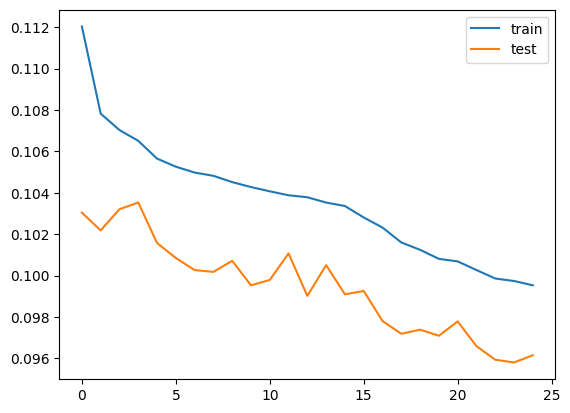

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


(2, 2)


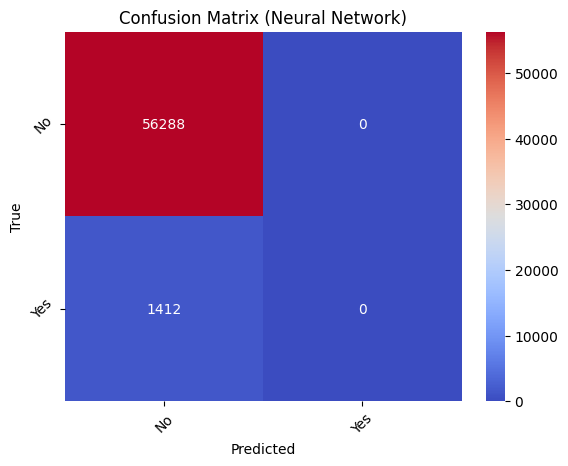

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

conf_mat = confusion_matrix(y_test, y_pred_binary)
print(conf_mat.shape)

ax = sns.heatmap(conf_mat, annot=True, fmt='g', cmap='coolwarm')
labels = ['No', 'Yes']
if conf_mat.shape == (2, 2):
    ax.set_xticklabels(labels, rotation=45)
    ax.set_yticklabels(labels, rotation=45)
else:
    ax.set_xticklabels(range(conf_mat.shape[1]), rotation=45)
    ax.set_yticklabels(range(conf_mat.shape[0]), rotation=45)

ax.set(xlabel='Predicted', ylabel='True', title='Confusion Matrix (Neural Network)')
plt.show()


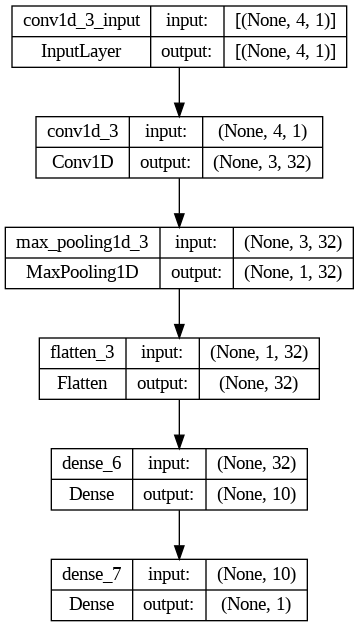

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

1804/1804 [==============================] - 3s 2ms/step - loss: 0.0962 - accuracy: 0.9753
Test Accuracy: 0.98
